# ADULT_KNN_CLASSIFICATION_V2_Full

###  Import Important Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsTransformer
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [3]:
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'sklearn version: {sklearn.__version__}')

pandas version: 1.1.3
numpy version: 1.19.2
seaborn version: 0.11.0
sklearn version: 0.23.2


### Step1: Import Dataset

In [4]:
# Add column names to data set
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
           'relationship', 'race','sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Read in train data
adult= pd.read_csv('Adult_pre.csv', header=None, names=columns, skipinitialspace=True)

In [5]:
adult.shape

(32561, 15)

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

### Workshop in Adult Dataset

1.Use the previous preprocessed adult data set, and apply the KNN learning algorithm through scklearn.

2.You are required to program in Python submit your ipybn file to the google classroom with the following results.

3.Report Accuracy rate, Confusion matrix, Plot train vs test dataset, Plot of Cross validation.

4.What is the optimal k?

5.Write 1 paragraph discuss the result of your model.

## Train Test Split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=101)

### Apply the KNN learning algorithm

In [75]:
#Applying Knn
from sklearn.neighbors import KNeighborsClassifier

In [127]:
knn = KNeighborsClassifier(n_neighbors = 5, p = 2, metric='minkowski')
knn.fit(X_train, y_train)
print('The accuracy of the Knn classifier on training data is {:.2f}'.format(knn.score(X_train, y_train)))
print('The accuracy of the Knn classifier on test data is {:.2f}'.format(knn.score(X_test, y_test)))

The accuracy of the Knn classifier on training data is 0.87
The accuracy of the Knn classifier on test data is 0.82


In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

In [78]:
y_pred = knn.predict(X_test) 

In [79]:
y_pred

array([0., 1., 1., ..., 1., 1., 0.])

## Accuracy Rate

In [80]:
print ("Accuracy : ", accuracy_score(y_test, y_pred))


Accuracy :  0.8209828393135725


In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88      7669
         1.0       0.67      0.57      0.61      2587

    accuracy                           0.82     10256
   macro avg       0.77      0.74      0.75     10256
weighted avg       0.81      0.82      0.82     10256



## Confusion matrix

In [82]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[6954,  715],
       [1121, 1466]], dtype=int64)

[[6954  715]
 [1121 1466]]


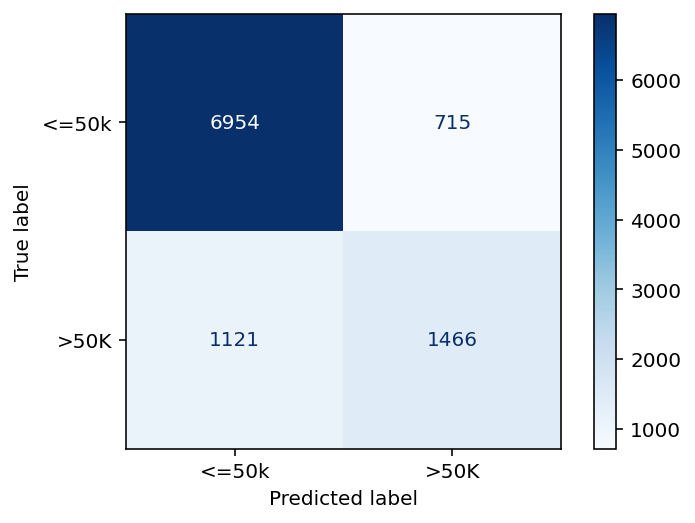

In [83]:
labels = ['<=50k','>50K']
disp = plot_confusion_matrix(knn, X_test, y_test,
                             display_labels = labels,
                             cmap = plt.cm.Blues)
print(disp.confusion_matrix)


In [128]:
cm_accuracy = (6954+1466)/(6954+715+1121+1466)
print('Confusion Matrix Accuracy:',cm_accuracy*100,'%')

Confusion Matrix Accuracy: 82.09828393135726 %


## Plot train vs test dataset

In [84]:
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 16)]
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit model on the training dataset
    knn.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = knn.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = knn.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.940, test: 0.788
>2, train: 0.880, test: 0.803
>3, train: 0.885, test: 0.810
>4, train: 0.869, test: 0.813
>5, train: 0.872, test: 0.817
>6, train: 0.863, test: 0.819
>7, train: 0.862, test: 0.821
>8, train: 0.857, test: 0.820
>9, train: 0.858, test: 0.822
>10, train: 0.853, test: 0.821
>11, train: 0.854, test: 0.823
>12, train: 0.851, test: 0.822
>13, train: 0.851, test: 0.824
>14, train: 0.851, test: 0.823
>15, train: 0.850, test: 0.823


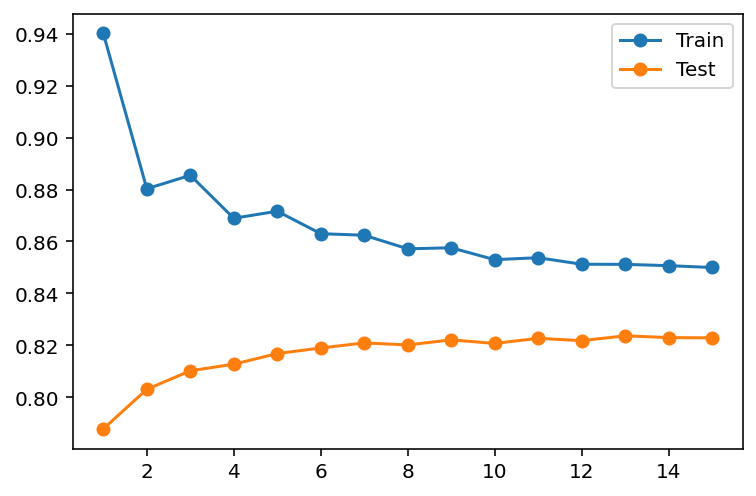

In [85]:
from matplotlib import pyplot
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [129]:
print('Test_accuracy:',test_acc)
print('\nTrain_accuracy:',train_acc)
print('\nScores_train:',scores_train)
print('\nScores_train:',scores_test)


Test_accuracy: 0.8229329173166927

Train_accuracy: 0.8499949763890284

Scores_train: [0.9400180849994977, 0.8802873505475736, 0.885461669848287, 0.8689339897518337, 0.8716467396764794, 0.8630061288053853, 0.8624032954887974, 0.8571787400783684, 0.8575806289560937, 0.8530091429719683, 0.8537626846177032, 0.85125087913192, 0.8512006430222043, 0.8506982819250477, 0.8499949763890284]

Scores_train: [0.7879290171606864, 0.8031396255850234, 0.8102574102964119, 0.8127925117004681, 0.8168876755070202, 0.8190327613104524, 0.8209828393135725, 0.8202028081123245, 0.8221528861154446, 0.8207878315132605, 0.8227379095163807, 0.8218603744149766, 0.8237129485179407, 0.8230304212168487, 0.8229329173166927]


## Plot of Cross Validation

#### k-fold cross-validation

In [ ]:
import statistics

# Experimenting with different k values
k_range = list(range(1,16))
scores_cv = []
scores_train = []
scores_test = []
models = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    scores_cv.append(statistics.mean(scores))
    knn.fit(X_train, y_train)
    
    y_pred_train = knn.predict(X_train)
    scores_train.append( metrics.accuracy_score(y_train, y_pred_train) )
    y_pred_test = knn.predict(X_test)
    scores_test.append( metrics.accuracy_score(y_test, y_pred_test) )
    models.append(knn)

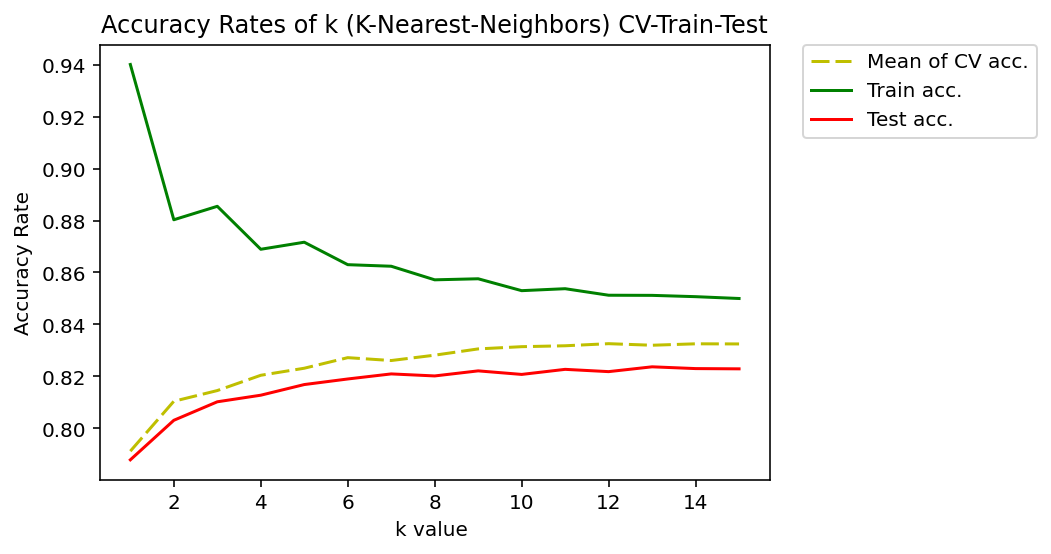

<Figure size 432x288 with 0 Axes>

In [99]:
# comparing CV scores, train and test scores

plt.plot(k_range, scores_cv, 'y', dashes=[6, 2], label = "Mean of CV acc.")
plt.plot(k_range, scores_train, 'g', label = "Train acc.")
plt.plot(k_range, scores_test, 'r', label= "Test acc.")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('k value ')
plt.ylabel('Accuracy Rate')

plt.title('Accuracy Rates of k (K-Nearest-Neighbors) CV-Train-Test')
plt.show()

plt.savefig('KNN_CV_Train_Test' + '.png', dpi=900)

In [115]:
print('Scores:',scores)
print('\nScores_CV:',scores_cv)
print('\nScores_train:',scores_train)
print('\nScores_train:',scores_test)
print('\nScores mean:',scores.mean())
print('\nScores max:',scores.max())

Scores: [0.84530387 0.82019086 0.84881969 0.8247112  0.83676544 0.82320442
 0.82864322 0.83015075 0.82613065 0.84120603]

Scores_CV: [0.7912693805542025, 0.8104597573502874, 0.8145784674250206, 0.8204561733832396, 0.8231690345247079, 0.8272378466920236, 0.8261324957282646, 0.8281922167340974, 0.8306032422282179, 0.8314579426514794, 0.8318093228573809, 0.8326133934362925, 0.8320101259688699, 0.832563142180011, 0.8325126132924795]

Scores_train: [0.9400180849994977, 0.8802873505475736, 0.885461669848287, 0.8689339897518337, 0.8716467396764794, 0.8630061288053853, 0.8624032954887974, 0.8571787400783684, 0.8575806289560937, 0.8530091429719683, 0.8537626846177032, 0.85125087913192, 0.8512006430222043, 0.8506982819250477, 0.8499949763890284]

Scores_train: [0.7879290171606864, 0.8031396255850234, 0.8102574102964119, 0.8127925117004681, 0.8168876755070202, 0.8190327613104524, 0.8209828393135725, 0.8202028081123245, 0.8221528861154446, 0.8207878315132605, 0.8227379095163807, 0.8218603744149766

In [97]:
import operator
index, value = max(enumerate(scores_cv), key=operator.itemgetter(1))

optimal_model = models[index]
print(optimal_model)

KNeighborsClassifier(metric='euclidean', n_neighbors=12)


## Find the optimal K

In [125]:
##### find optimal K #####

# Find maximum value in cv score list
cv_most_acc = max(scores_cv)
cv_optimal = scores_cv.index(cv_most_acc)

print("The most optimal K :",cv_optimal+1) # K = max.score.index + 1 (because array start from 0)
print("Accuracy : ",scores_cv[11])
print("Model :", models[cv_optimal])

The most optimal K : 12
Accuracy :  0.8326133934362925
Model : KNeighborsClassifier(metric='euclidean', n_neighbors=12)


### Model Evaluate Report

3.Report Accuracy rate, Confusion matrix, Plot train vs test dataset, Plot of Cross validation.
* 1.Confusion Matrix Accuracy: 82.098 %
* 
* 2.Plot train vs test dataset(K = 1-15)
* The accuracy of the Knn classifier on training data is 87 % at K=5
* The accuracy of the Knn classifier on test data is 82 % at K=5
*    1. train: 0.940, test: 0.788
*    2. train: 0.880, test: 0.803
*    3. train: 0.885, test: 0.810
*    4. train: 0.869, test: 0.813
*    5. train: 0.872, test: 0.817
*    6. train: 0.863, test: 0.819
*    7. train: 0.862, test: 0.821
*    8. train: 0.857, test: 0.820
*    9. train: 0.858, test: 0.822
*    10. train: 0.853, test: 0.821
*    11. train: 0.854, test: 0.823
*    12. train: 0.851, test: 0.822
*    13. train: 0.851, test: 0.824
*    14. train: 0.851, test: 0.823
*    15. train: 0.850, test: 0.823
* 
* 3.Plot of Cross validation.(using k-fold, CV = 10)
*   1. 0.84530387 
*   2. 0.82019086 
*   3. 0.84881969 
*   4. 0.8247112  
*   5. 0.83676544 
*   6. 0.82320442
*   7. 0.82864322 
*   8. 0.83015075 
*   9. 0.82613065 
*   10. 0.84120603
*  3rd CV is generate the best accuracy : 84.88 %
*
4.What is the optimal k?
*   Maximum value in cv score list, K : 12
*   Accuracy :  83.26 %

Report by Nattawat W.